In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
df

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,3,1,3,3,4,4,3,4,4,1,2,2
1,2,1,1,5,6,5,2,2,3,2,1,2
2,1,2,1,3,5,6,1,3,2,4,1,2
3,1,1,1,2,2,2,2,4,2,1,1,1
4,1,2,1,7,6,5,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
105,6,7,6,4,4,4,6,4,4,6,7,6
106,6,4,7,4,4,6,6,5,4,6,7,7
107,7,6,4,4,2,2,7,6,4,2,4,4
108,7,7,7,4,4,4,6,6,4,6,7,7


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  0.36950246895818534
3  :  0.2587490004646144
4  :  0.2540622692961127
5  :  0.2022293567076491
6  :  0.21524335675307885
7  :  0.20594410171273583
8  :  0.15323272481718375
9  :  0.1720770031867343
10  :  0.1546096333976869
11  :  0.16867293044676532
12  :  0.14642588453683866
13  :  0.15147443138100578
14  :  0.14875937163595793


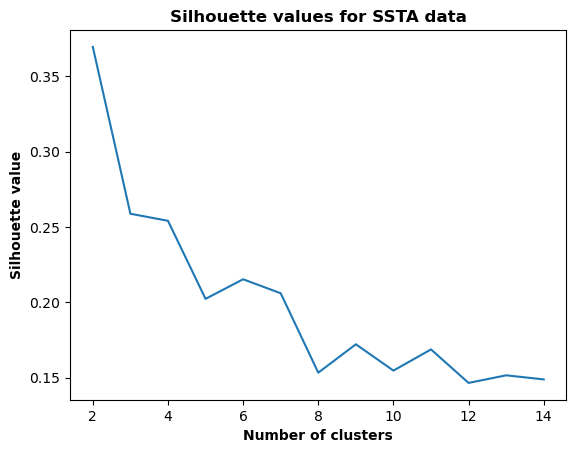

In [3]:
#Validating the number of clusters using silhouette index

k_range = range(2, 15)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel("Number of clusters",fontweight='bold',fontsize=10)
plt.ylabel("Silhouette value",fontweight='bold',fontsize=10)
plt.title("Silhouette values for SSTA data",fontweight='bold',fontsize=12)
plt.savefig("Silhouette values for SSTA data.png")

In [5]:
km = KMeans(n_clusters=8,random_state=42,n_init=30)
km.fit(df) 

values=km.labels_
vals=[i for i in values]

cnt=[0 for i in range(8)]
for i in range(len(vals)):
    cnt[vals[i]]+=1
print("Number of years in each cluster\n",cnt)

Number of years in each cluster
 [12, 12, 12, 22, 15, 14, 14, 9]


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
vals

[3,
 0,
 0,
 7,
 0,
 0,
 3,
 7,
 7,
 7,
 7,
 0,
 7,
 0,
 4,
 3,
 7,
 7,
 4,
 5,
 3,
 0,
 0,
 0,
 3,
 5,
 3,
 0,
 7,
 0,
 4,
 0,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 4,
 1,
 4,
 3,
 5,
 2,
 4,
 5,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 5,
 4,
 5,
 5,
 5,
 2,
 3,
 4,
 5,
 3,
 1,
 1,
 5,
 5,
 2,
 5,
 3,
 3,
 5,
 4,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 6,
 2,
 6,
 6,
 1,
 1,
 6,
 6,
 2,
 1,
 1,
 2,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6]

In [5]:
# df = pd.DataFrame(vals, columns=(['Cluster Number']))
# df.to_csv('SSTA 8 Cluster Number 1901-2010.csv')

In [7]:
# labels = kmeans.labels_
# labels
km.inertia_

1189.6309523809525

In [8]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[]
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[]
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster_not_indexs

{0: [1902, 1903, 1905, 1906, 1912, 1914, 1922, 1923, 1924, 1928, 1930, 1932],
 1: [1941, 1969, 1970, 1979, 1980, 1982, 1983, 1987, 1992, 1993, 1997, 1998],
 2: [1937, 1945, 1964, 1973, 1984, 1985, 1986, 1989, 1996, 1999, 2000, 2008],
 3: [1901,
  1907,
  1916,
  1921,
  1925,
  1927,
  1933,
  1934,
  1935,
  1938,
  1939,
  1943,
  1948,
  1949,
  1950,
  1951,
  1955,
  1956,
  1965,
  1968,
  1975,
  1976],
 4: [1915,
  1919,
  1931,
  1940,
  1942,
  1946,
  1952,
  1953,
  1954,
  1957,
  1958,
  1960,
  1966,
  1978,
  1981],
 5: [1920,
  1926,
  1936,
  1944,
  1947,
  1959,
  1961,
  1962,
  1963,
  1967,
  1971,
  1972,
  1974,
  1977],
 6: [1988,
  1990,
  1991,
  1994,
  1995,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010],
 7: [1904, 1908, 1909, 1910, 1911, 1913, 1917, 1918, 1929]}

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

def PlotSSTMap(data, cluster=None):
    
    # Replace non-null values with null and null values with 100
    data = np.where(np.isnan(data), -0, np.nan)

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create a colormap
    cmap = plt.get_cmap('Greens')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Indian Ocean Dipole/Zonal Mode': [
            [[50//2, 70//2], [-10//2+45, 10//2+45]],  # Indian Ocean Dipole
            [[90//2, 110//2],[-10//2+45,0//2+45]]    # Zonal Mode
        ],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [5//2+45, -15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    }

    colors = ["black","blue","purple","purple","orange","red","navy","cyan","magenta","teal","brown","yellow","olive"]
    
    i = 0
    for name, coords in regions.items():
        if name == 'Indian Ocean Dipole/Zonal Mode':
            for sub_name, sub_coords in zip(['Indian Ocean Dipole', 'Zonal Mode'], coords):
                x1, x2 = sub_coords[0]
                y1, y2 = sub_coords[1]
                rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor=colors[i], facecolor='None', label=sub_name)
                ax.add_patch(rect)
                i += 1
        else:
            x1, x2 = coords[0]
            y1, y2 = coords[1]
            rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor=colors[i], facecolor='None', label=name)
            ax.add_patch(rect)
            i += 1

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Add colorbar
    # cbar = plt.colorbar(im, ax=ax, label='Temperature')
    # cbar = plt.colorbar(im, ax=ax)

    # Set axis labels
    # ax.set_xlabel('Longitude')
    # ax.set_ylabel('Latitude')
#     ax.set_title(f'Cluster {cluster}', fontweight='bold', fontsize=20)

    # Add legends outside of the map
#     legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=name)
#                        for i, (name, coords) in enumerate(regions.items()) if name != 'Indian Ocean Dipole/Zonal Mode']
    
#     # Add separate legend entries for 'Indian Ocean Dipole' and 'Zonal Mode'
#     legend_elements.extend([
#         Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label='Indian Ocean Dipole'),
#         Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i+1], markersize=10, label='Zonal Mode'),
#     ])
    
#     ax.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.5)

    plt.savefig(f'SSTA 12 Regiaaons.png', dpi=100, bbox_inches='tight')
    plt.show()

# Example usage:
# PlotSSTMap(your_data, cluster_number)


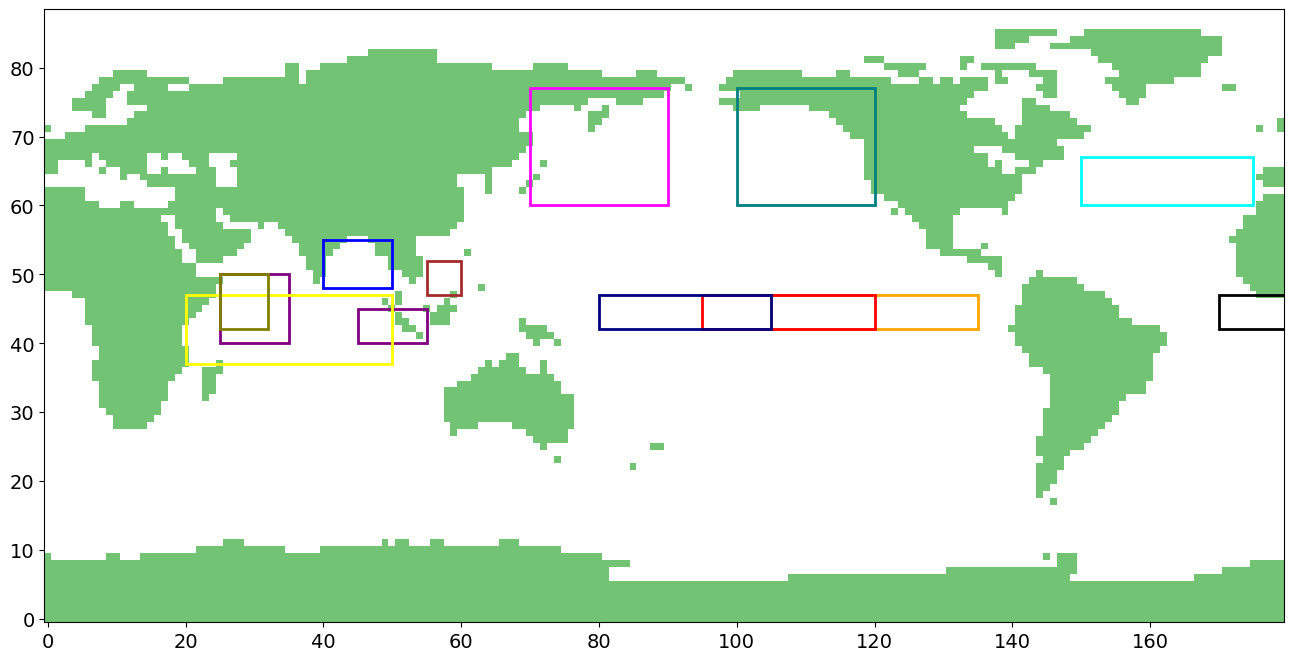

In [58]:
PlotSSTMap(sst_cluster1_fullMap.to_array()[0],cluster=1)


In [10]:
def PlotAllMap(data,rainfall,cluster=None):
    
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(2,8,figsize=(100,15))
    
    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer
    cmap.set_bad(color="lightgreen")

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0 # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    
    colors = ['#444444','#333333', '#191970', '#228B22', '#800000',  '#800080',  
              '#2E8B57','#483D8B','#008080','#000080','#708090','#556B2F']
   
    
    cluster=1
    
    for i, ax in enumerate(axes.ravel()):
        
        if(i<8):
            j=0
            for name, coords in regions.items():
                x1, x2 = coords[0]
                y1, y2 = coords[1]
                rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor=colors[j],facecolor='None')
                ax.add_patch(rect)
                j+=1

            # Plot the average yearly rainfall data using the colormap
            im = ax.imshow(data[i].to_array()[0], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, label='Temperature')
        else:
            im = ax.imshow(rainfall[i-8], cmap='BrBG', vmin=vmin, vmax=vmax, origin='lower',
                   extent=[rainfall[i-8]['lon'].min(), rainfall[i-8]['lon'].max(),
                           rainfall[i-8]['lat'].min(), rainfall[i-8]['lat'].max()])


            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, label='Rainfall')
        
        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Cluster {cluster}')
        cluster+=1
        
        if(cluster>8):
            cluster=1
            

    #plt.savefig(f'SSTA 8 Clusters.png')


In [11]:
def PlotRainFallMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

#     if(cluster==8):
#         # Add colorbar
#     cbar = plt.colorbar(im, ax=ax, label='Rainfall')
#     cbar = plt.colorbar(im, ax=ax)
    
   
    # Set axis labels
#     ax.set_xlabel('Longitude')
#     ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}',fontweight='bold',fontsize=20)
    
#     plt.savefig(f'SSTA 8 Clusters {cluster} INDIAN RAINFALL.png', dpi=100, bbox_inches='tight')


In [11]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]
region13=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]
path13=[]


#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")
    path13.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\No 12 Regions\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))
    region13.append(xarray.open_dataset(path13[i]))

    

In [12]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]
zone7=[]
zone8=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 7\Zone7_Anomaly_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 8\Zone8_Anomaly_{i}.nc")

    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))
    zone7.append(xarray.open_dataset(path7[i]))
    zone8.append(xarray.open_dataset(path8[i]))


In [13]:
def getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,
                      region7,region8,region9,region10,region11,region12,
                      region13,cluster_years):
    
    cluster_region1=[]
    cluster_region2=[]
    cluster_region3=[]
    cluster_region4=[]
    cluster_region5=[]
    cluster_region6=[]
    cluster_region7=[]
    cluster_region8=[]
    cluster_region9=[]
    cluster_region10=[]
    cluster_region11=[]
    cluster_region12=[]
    cluster_region13=[]

    
    for i in cluster_years:
        cluster_region1.append(region1[i])
        cluster_region2.append(region2[i])
        cluster_region3.append(region3[i])
        cluster_region4.append(region4[i])
        cluster_region5.append(region5[i])
        cluster_region6.append(region6[i])
        cluster_region7.append(region7[i])
        cluster_region8.append(region8[i])
        cluster_region9.append(region9[i])
        cluster_region10.append(region10[i])
        cluster_region11.append(region11[i])
        cluster_region12.append(region12[i])
        cluster_region13.append(region13[i])


    cluster_region1_combined=xarray.concat(cluster_region1,dim='years')
    cluster_region2_combined=xarray.concat(cluster_region2,dim='years')
    cluster_region3_combined=xarray.concat(cluster_region3,dim='years')
    cluster_region4_combined=xarray.concat(cluster_region4,dim='years')
    cluster_region5_combined=xarray.concat(cluster_region5,dim='years')
    cluster_region6_combined=xarray.concat(cluster_region6,dim='years')
    cluster_region7_combined=xarray.concat(cluster_region7,dim='years')
    cluster_region8_combined=xarray.concat(cluster_region8,dim='years')
    cluster_region9_combined=xarray.concat(cluster_region9,dim='years')
    cluster_region10_combined=xarray.concat(cluster_region10,dim='years')
    cluster_region11_combined=xarray.concat(cluster_region11,dim='years')
    cluster_region12_combined=xarray.concat(cluster_region12,dim='years')
    cluster_region13_combined=xarray.concat(cluster_region13,dim='years')


    cluster_region1_mean=cluster_region1_combined.mean(dim='years')
    cluster_region2_mean=cluster_region2_combined.mean(dim='years')
    cluster_region3_mean=cluster_region3_combined.mean(dim='years')
    cluster_region4_mean=cluster_region4_combined.mean(dim='years')
    cluster_region5_mean=cluster_region5_combined.mean(dim='years')
    cluster_region6_mean=cluster_region6_combined.mean(dim='years')
    cluster_region7_mean=cluster_region7_combined.mean(dim='years')
    cluster_region8_mean=cluster_region8_combined.mean(dim='years')
    cluster_region9_mean=cluster_region9_combined.mean(dim='years')
    cluster_region10_mean=cluster_region10_combined.mean(dim='years')
    cluster_region11_mean=cluster_region11_combined.mean(dim='years')
    cluster_region12_mean=cluster_region12_combined.mean(dim='years')
    cluster_region13_mean=cluster_region13_combined.mean(dim='years')


    cluster_fullMap=cluster_region1_mean.combine_first(cluster_region2_mean.combine_first(cluster_region3_mean.combine_first(
                    cluster_region4_mean.combine_first(cluster_region5_mean.combine_first(cluster_region6_mean.combine_first(
                    cluster_region7_mean.combine_first(cluster_region8_mean.combine_first(cluster_region9_mean.combine_first(
                    cluster_region10_mean.combine_first(cluster_region11_mean.combine_first(cluster_region12_mean.combine_first(
                    cluster_region13_mean))))))))))))
    
    return cluster_fullMap

In [14]:
def getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster_years):
    
    cluster_region1=[]
    cluster_region2=[]
    cluster_region3=[]
    cluster_region4=[]
    cluster_region5=[]
    cluster_region6=[]
    cluster_region7=[]
    cluster_region8=[]
   
    for i in cluster_years:
        cluster_region1.append(zone1[i])
        cluster_region2.append(zone2[i])
        cluster_region3.append(zone3[i])
        cluster_region4.append(zone4[i])
        cluster_region5.append(zone5[i])
        cluster_region6.append(zone6[i])
        cluster_region7.append(zone7[i])
        cluster_region8.append(zone8[i])
        

    cluster_region1_combined=xarray.concat(cluster_region1,dim='years')
    cluster_region2_combined=xarray.concat(cluster_region2,dim='years')
    cluster_region3_combined=xarray.concat(cluster_region3,dim='years')
    cluster_region4_combined=xarray.concat(cluster_region4,dim='years')
    cluster_region5_combined=xarray.concat(cluster_region5,dim='years')
    cluster_region6_combined=xarray.concat(cluster_region6,dim='years')
    cluster_region7_combined=xarray.concat(cluster_region7,dim='years')
    cluster_region8_combined=xarray.concat(cluster_region8,dim='years')
    
    cluster_region1_mean=cluster_region1_combined['rain'].mean(dim='years')
    cluster_region2_mean=cluster_region2_combined['rain'].mean(dim='years')
    cluster_region3_mean=cluster_region3_combined['rain'].mean(dim='years')
    cluster_region4_mean=cluster_region4_combined['rain'].mean(dim='years')
    cluster_region5_mean=cluster_region5_combined['rain'].mean(dim='years')
    cluster_region6_mean=cluster_region6_combined['rain'].mean(dim='years')
    cluster_region7_mean=cluster_region7_combined['rain'].mean(dim='years')
    cluster_region8_mean=cluster_region8_combined['rain'].mean(dim='years')
   


    cluster_fullMap=cluster_region1_mean.combine_first(cluster_region2_mean.combine_first(cluster_region3_mean.combine_first(
                   cluster_region4_mean.combine_first(cluster_region5_mean.combine_first(cluster_region6_mean.combine_first(
                   cluster_region7_mean.combine_first(cluster_region8_mean)))))))
    
    return cluster_fullMap

In [15]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]

sst_cluster1_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster1_years)
sst_cluster2_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster2_years)
sst_cluster3_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster3_years)
sst_cluster4_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster4_years)
sst_cluster5_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster5_years)
sst_cluster6_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster6_years)
sst_cluster7_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster7_years)
sst_cluster8_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster8_years)


rainfall_cluster1_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster1_years)
rainfall_cluster2_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster2_years)
rainfall_cluster3_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster3_years)
rainfall_cluster4_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster4_years)
rainfall_cluster5_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster5_years)
rainfall_cluster6_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster6_years)
rainfall_cluster7_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster7_years)
rainfall_cluster8_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster8_years)



In [16]:
PlotRainFallMap(rainfall_cluster1_fullMap,1)
PlotRainFallMap(rainfall_cluster2_fullMap,2)
PlotRainFallMap(rainfall_cluster3_fullMap,3)
PlotRainFallMap(rainfall_cluster4_fullMap,4)
PlotRainFallMap(rainfall_cluster5_fullMap,5)
PlotRainFallMap(rainfall_cluster6_fullMap,6)
PlotRainFallMap(rainfall_cluster7_fullMap,7)
PlotRainFallMap(rainfall_cluster8_fullMap,8)

NameError: name 'PlotRainFallMap' is not defined

In [ ]:
PlotSSTMap(sst_cluster1_fullMap.to_array()[0],cluster=1)
PlotSSTMap(sst_cluster2_fullMap.to_array()[0],cluster=2)
PlotSSTMap(sst_cluster3_fullMap.to_array()[0],cluster=3)
PlotSSTMap(sst_cluster4_fullMap.to_array()[0],cluster=4)
PlotSSTMap(sst_cluster5_fullMap.to_array()[0],cluster=5)
PlotSSTMap(sst_cluster6_fullMap.to_array()[0],cluster=6)
PlotSSTMap(sst_cluster7_fullMap.to_array()[0],cluster=7)
PlotSSTMap(sst_cluster8_fullMap.to_array()[0],cluster=8)


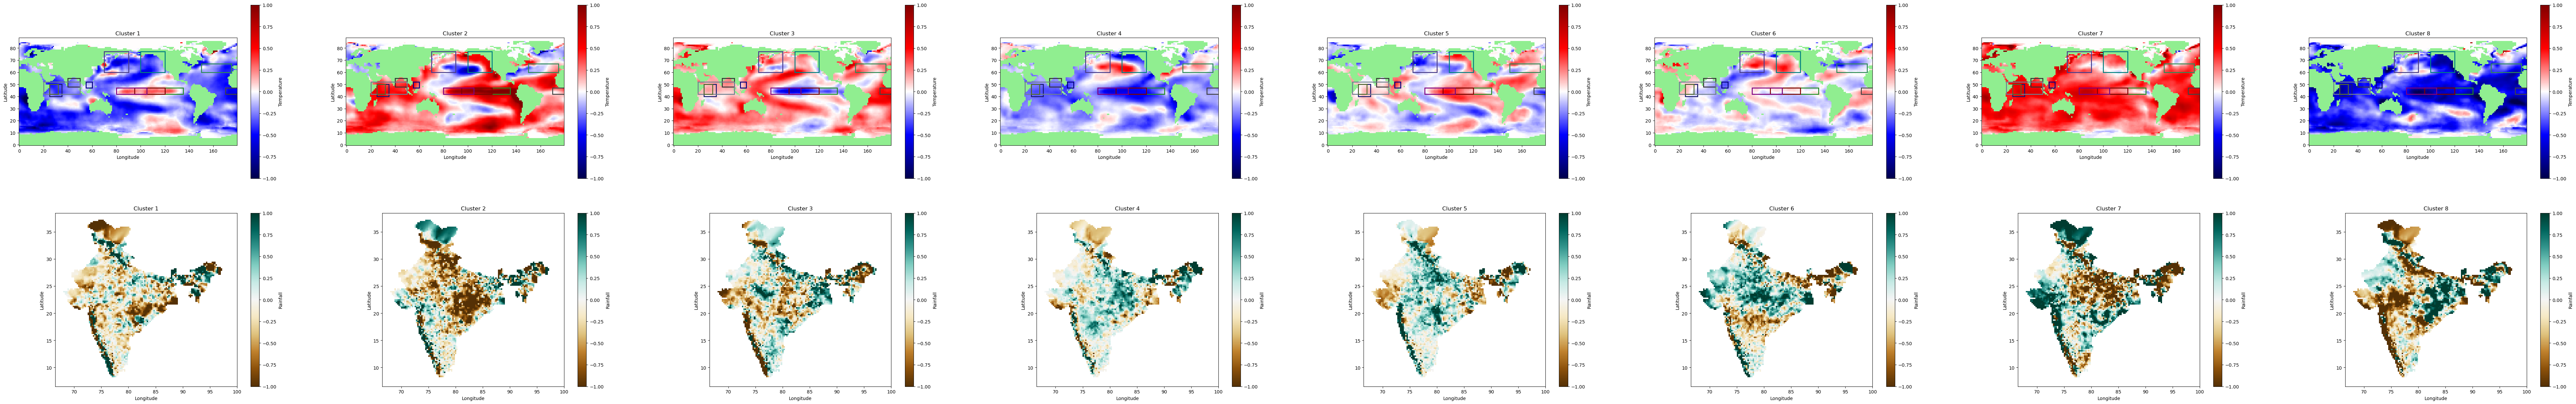

In [19]:
sst_arr=[sst_cluster1_fullMap,sst_cluster2_fullMap,sst_cluster3_fullMap,sst_cluster4_fullMap,
         sst_cluster5_fullMap,sst_cluster6_fullMap,sst_cluster7_fullMap,sst_cluster8_fullMap]

rainfall_arr=[rainfall_cluster1_fullMap,rainfall_cluster2_fullMap,rainfall_cluster3_fullMap,rainfall_cluster4_fullMap,
              rainfall_cluster5_fullMap,rainfall_cluster6_fullMap,rainfall_cluster7_fullMap,rainfall_cluster8_fullMap]
PlotAllMap(sst_arr,rainfall_arr)


In [ ]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]


#Storing the paths in a array
for i in range(2010,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))

    

In [22]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
predict_category

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,7,6,6,4,3,3,5,6,4,3,6,6
1,4,7,6,5,4,4,7,5,4,7,6,5
2,6,7,7,4,4,4,6,4,5,7,7,7
3,6,7,7,5,5,6,6,5,6,7,7,7
4,7,7,7,6,6,7,7,6,7,6,7,7
5,6,7,7,6,7,7,7,5,6,7,7,7
6,7,7,7,6,6,6,7,6,5,4,7,7
7,6,7,7,4,4,6,7,7,6,7,7,7
8,7,7,7,6,6,6,7,6,6,6,7,7
9,7,7,7,6,6,6,7,6,6,7,7,7


In [23]:
predicted=km.predict(predict_category)

In [25]:
predicted

array([2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2])

In [26]:
yr=2011
indx=110
for i in range(len(predicted)):
    years_Cluster[predicted[i]].append(indx)
    years_Cluster_not_indexs[predicted[i]].append(yr)
    indx+=1
    yr+=1


In [27]:
years_Cluster_not_indexs

{0: [1902, 1903, 1905, 1906, 1912, 1914, 1922, 1923, 1924, 1928, 1930, 1932],
 1: [1941, 1969, 1970, 1979, 1980, 1982, 1983, 1987, 1992, 1993, 1997, 1998],
 2: [1937,
  1945,
  1964,
  1973,
  1984,
  1985,
  1986,
  1989,
  1996,
  1999,
  2000,
  2008,
  2011,
  2022],
 3: [1901,
  1907,
  1916,
  1921,
  1925,
  1927,
  1933,
  1934,
  1935,
  1938,
  1939,
  1943,
  1948,
  1949,
  1950,
  1951,
  1955,
  1956,
  1965,
  1968,
  1975,
  1976],
 4: [1915,
  1919,
  1931,
  1940,
  1942,
  1946,
  1952,
  1953,
  1954,
  1957,
  1958,
  1960,
  1966,
  1978,
  1981],
 5: [1920,
  1926,
  1936,
  1944,
  1947,
  1959,
  1961,
  1962,
  1963,
  1967,
  1971,
  1972,
  1974,
  1977],
 6: [1988,
  1990,
  1991,
  1994,
  1995,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021],
 7: [1904, 1908, 1909, 1910, 1911, 1913, 1917, 1918, 1929]}

In [28]:
for i in years_Cluster_not_indexs.values():
    print(len(i))

12
12
14
22
15
14
24
9


In [138]:
df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('SSTA 8 Cluster Number 2011-2022.csv')
df

,Cluster Number
0,2
1,6
2,6
3,6
4,6
5,6
6,6
7,6
8,6
9,6


In [141]:
ssta1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
ssta2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
ssta=pd.concat([ssta1,ssta2])
ssta=ssta.set_index(i for i in range(122))

In [142]:
clusters_indexes=[[] for _ in range(8)]

for i in range(len(vals)):
    clusters_indexes[vals[i]].append(i)
    print(i,vals[i])

clusters_indexes

0 3
1 0
2 0
3 7
4 0
5 0
6 3
7 7
8 7
9 7
10 7
11 0
12 7
13 0
14 4
15 3
16 7
17 7
18 4
19 5
20 3
21 0
22 0
23 0
24 3
25 5
26 3
27 0
28 7
29 0
30 4
31 0
32 3
33 3
34 3
35 5
36 2
37 3
38 3
39 4
40 1
41 4
42 3
43 5
44 2
45 4
46 5
47 3
48 3
49 3
50 3
51 4
52 4
53 4
54 3
55 3
56 4
57 4
58 5
59 4
60 5
61 5
62 5
63 2
64 3
65 4
66 5
67 3
68 1
69 1
70 5
71 5
72 2
73 5
74 3
75 3
76 5
77 4
78 1
79 1
80 4
81 1
82 1
83 2
84 2
85 2
86 1
87 6
88 2
89 6
90 6
91 1
92 1
93 6
94 6
95 2
96 1
97 1
98 2
99 2
100 6
101 6
102 6
103 6
104 6
105 6
106 6
107 2
108 6
109 6
110 2
111 6
112 6
113 6
114 6
115 6
116 6
117 6
118 6
119 6
120 6
121 2


[[1, 2, 4, 5, 11, 13, 21, 22, 23, 27, 29, 31],
 [40, 68, 69, 78, 79, 81, 82, 86, 91, 92, 96, 97],
 [36, 44, 63, 72, 83, 84, 85, 88, 95, 98, 99, 107, 110, 121],
 [0,
  6,
  15,
  20,
  24,
  26,
  32,
  33,
  34,
  37,
  38,
  42,
  47,
  48,
  49,
  50,
  54,
  55,
  64,
  67,
  74,
  75],
 [14, 18, 30, 39, 41, 45, 51, 52, 53, 56, 57, 59, 65, 77, 80],
 [19, 25, 35, 43, 46, 58, 60, 61, 62, 66, 70, 71, 73, 76],
 [87,
  89,
  90,
  93,
  94,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  108,
  109,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120],
 [3, 7, 8, 9, 10, 12, 16, 17, 28]]

In [143]:
ssta_category_sst_clusters_years_seprated=[]

for i in range(8):
    ssta_category_sst_clusters_years_seprated.append(ssta.loc[clusters_indexes[i]])

In [144]:
ssta_category_sst_clusters_years_seprated[1]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
40,4,5,7,7,7,6,4,2,5,7,7,7
68,6,7,6,6,6,6,2,5,3,6,7,6
69,4,7,7,4,4,5,2,4,4,6,7,7
78,4,6,6,5,5,5,2,3,5,7,6,6
79,4,7,6,5,5,6,4,3,4,6,6,6
81,6,6,6,6,6,6,3,5,4,5,6,6
82,4,6,7,7,7,6,5,4,4,5,7,6
86,6,7,7,7,6,6,4,3,4,6,7,7
91,3,7,6,7,7,6,6,5,6,6,6,6
92,5,5,6,7,6,6,5,4,5,5,6,5


In [145]:
ssta_cluster_1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 1901-2010.csv",index_col=0)
ssta_cluster_2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Codes\Main Codes\SST Clusters\SSTA 8 Cluster Number 2011-2022.csv",index_col=0)
ssta_cluster=pd.concat([ssta_cluster_1,ssta_cluster_2])
ssta_cluster=ssta_cluster.set_index(i for i in range(122))

In [146]:
ssta_cluster

,Cluster Number
0,3
1,0
2,0
3,7
4,0
...,...
117,6
118,6
119,6
120,6


In [147]:
ssta_clusters_sst_clusters_years_seprated=[]

for i in range(8):
    ssta_clusters_sst_clusters_years_seprated.append(ssta_cluster.loc[clusters_indexes[i]])

In [153]:
ssta_clusters_sst_clusters_years_seprated[7]

,Cluster Number
3,7
7,7
8,7
9,7
10,7
12,7
16,7
17,7
28,7


In [162]:
merged_sstaCategory_sstaCluster=[]

for i in range(8):
    merged_sstaCategory_sstaCluster.append(pd.concat([ssta_category_sst_clusters_years_seprated[i],
                                                     ssta_clusters_sst_clusters_years_seprated[i]],axis=1))

In [174]:
for i in range(len(merged_sstaCategory_sstaCluster)):
    merged_sstaCategory_sstaCluster[i].to_csv(f"SSTA Cluster {i} - SSTA Category & SSTA 8 Clusters.csv")

In [163]:
merged_sstaCategory_sstaCluster[0]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
1,2,1,1,5,6,5,2,2,3,2,1,2,0
2,1,2,1,3,5,6,1,3,2,4,1,2,0
4,1,2,1,7,6,5,2,2,2,1,1,1,0
5,1,4,2,3,4,4,3,3,3,5,2,2,0
11,4,5,2,6,6,5,1,4,3,4,2,2,0
13,2,2,2,6,6,6,2,4,2,5,2,2,0
21,2,2,2,3,3,4,2,4,3,5,2,2,0
22,2,2,2,4,4,4,3,4,4,2,2,2,0
23,6,4,2,4,4,4,3,3,4,4,2,2,0
27,2,2,2,4,4,4,3,2,4,4,2,2,0


In [164]:
merged_sstaCategory_sstaCluster[1]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
40,4,5,7,7,7,6,4,2,5,7,7,7,1
68,6,7,6,6,6,6,2,5,3,6,7,6,1
69,4,7,7,4,4,5,2,4,4,6,7,7,1
78,4,6,6,5,5,5,2,3,5,7,6,6,1
79,4,7,6,5,5,6,4,3,4,6,6,6,1
81,6,6,6,6,6,6,3,5,4,5,6,6,1
82,4,6,7,7,7,6,5,4,4,5,7,6,1
86,6,7,7,7,6,6,4,3,4,6,7,7,1
91,3,7,6,7,7,6,6,5,6,6,6,6,1
92,5,5,6,7,6,6,5,4,5,5,6,5,1


In [165]:
merged_sstaCategory_sstaCluster[2]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
36,5,5,3,4,3,3,4,4,4,6,4,4,2
44,6,6,5,3,2,2,6,3,6,6,5,4,2
63,4,6,6,2,3,4,2,4,4,3,6,6,2
72,7,7,6,3,4,4,2,5,4,6,6,6,2
83,6,5,4,4,3,3,5,4,5,6,4,4,2
84,6,6,4,2,2,2,2,4,4,6,5,4,2
85,6,6,5,4,4,4,4,4,5,3,5,6,2
88,5,4,4,2,2,2,6,5,4,5,4,4,2
95,7,6,5,3,4,4,4,5,5,3,6,6,2
98,7,7,6,3,2,2,7,5,3,7,6,6,2


In [166]:
merged_sstaCategory_sstaCluster[3]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
0,3,1,3,3,4,4,3,4,4,1,2,2,3
6,2,1,1,2,2,2,5,6,4,1,2,1,3
15,4,2,2,2,2,2,5,3,2,2,2,2,3
20,5,3,2,1,1,2,4,5,4,2,2,2,3
24,3,1,2,3,2,2,4,5,3,2,1,2,3
26,2,2,2,2,2,2,5,4,4,4,1,2,3
32,4,3,2,3,2,2,4,4,4,2,2,2,3
33,5,1,1,2,2,2,6,4,6,1,1,1,3
34,4,2,3,3,2,3,4,3,4,2,2,3,3
37,2,4,2,2,2,2,6,4,4,3,2,2,3


In [167]:
merged_sstaCategory_sstaCluster[4]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
14,3,5,4,6,6,7,4,3,3,7,4,3,4
18,1,4,4,4,4,3,2,4,3,5,4,4,4
30,3,7,4,6,6,4,6,3,4,6,5,4,4
39,4,2,4,6,6,6,5,2,5,4,4,3,4
41,3,3,6,4,5,6,4,3,5,6,6,5,4
45,2,3,6,4,3,4,4,2,4,7,5,6,4
51,4,4,5,4,5,4,6,4,4,6,4,5,4
52,3,4,5,6,6,5,6,3,4,6,4,5,4
53,2,4,4,2,3,4,5,4,4,5,3,4,4
56,3,4,4,6,6,5,2,4,6,4,4,4,4


In [168]:
merged_sstaCategory_sstaCluster[5]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
19,4,4,4,4,4,4,4,5,4,2,4,5,5
25,6,5,5,6,6,5,2,2,6,2,4,5,5
35,2,4,4,4,4,4,4,2,5,2,3,4,5
43,7,1,5,6,5,4,6,5,5,2,4,6,5
46,4,2,6,4,4,5,2,4,5,1,4,6,5
58,6,5,4,4,5,4,2,5,5,4,4,4,5
60,6,4,4,4,4,4,5,4,4,4,4,4,5
61,4,4,4,2,3,4,4,6,6,3,4,5,5
62,6,2,4,4,4,4,3,6,6,1,4,4,5
66,4,4,4,2,3,4,4,5,4,2,4,4,5


In [170]:
merged_sstaCategory_sstaCluster[6]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
87,7,7,6,3,4,4,5,4,4,7,7,6,6
89,5,6,6,5,5,6,4,6,5,6,7,7,6
90,6,7,7,5,6,6,4,6,5,5,7,7,6
93,6,3,6,4,6,6,5,5,5,6,6,6,6
94,7,6,6,4,6,6,7,5,4,5,6,6,6
100,6,7,7,5,4,4,5,4,4,7,7,7,6
101,6,6,6,6,6,6,6,6,4,7,7,6,6
102,6,7,7,4,5,6,5,4,5,7,7,7,6
103,5,6,6,5,5,6,6,6,5,6,6,6,6
104,6,7,7,5,6,6,6,5,6,5,7,7,6


In [171]:
merged_sstaCategory_sstaCluster[7]

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,Cluster Number
3,1,1,1,2,2,2,2,4,2,1,1,1,7
7,1,1,1,2,2,3,2,2,2,3,1,1,7
8,2,2,1,2,2,2,2,2,2,3,1,1,7
9,4,1,1,1,1,1,2,4,2,2,1,1,7
10,1,1,1,2,2,2,2,2,2,2,1,1,7
12,4,2,2,3,4,2,2,3,3,2,2,1,7
16,4,1,1,2,2,1,2,4,4,1,1,1,7
17,1,1,1,3,2,2,2,6,4,1,1,1,7
28,3,4,2,3,3,3,2,2,4,1,2,2,7
